# Мультикласова класифікація

У цьому домашньому завданні ми будемо працювати з наступним набором даних:
https://archive.ics.uci.edu/ml/datasets/car+evaluation

Ми передбачимо клас автомобілів відповідно до його характеристик. Клас може бути unacceptable, acceptable, good, very good.

Ми завантажуємо набір даних з hw_5_data.csv, наданого вам для виконання домашнього завдання.

0. Розташуйте всі імпорти під цією секцією.

In [57]:
import warnings
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"missingno: {msno.__version__}")
print(f"numpy: {np.__version__}")

pandas: 1.5.3
seaborn: 0.12.2
missingno: 0.5.2
numpy: 1.22.4


1.1. Завантажте набір даних у змінну df за допомогою Pandas. Виведіть перші 5 записів та форму набору даних.

In [3]:
url = 'https://raw.githubusercontent.com/dmytrovelychko/rd_ds_python/main/datasets/hw_5_data.csv'
df = pd.read_csv(url)
print(f"shape: {df.shape}")
df[:5]

shape: (1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


1.2. Набір даних не має імен стовпців. Дайте наступні імена стовпцям:
`['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']`

In [4]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


2. Виведіть кількість унікальних значень кожної з незалежних змінних програмно. Формат числовий, а не візуальний. Приклад відповіді для одного стовпця:
```
med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64
```
Необхідно, щоб були назви стовпців, назви значень та кількість рядків із цим значенням.

In [6]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64 

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64 

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64 

4       576
more    576
2       575
Name: persons, dtype: int64 

med      576
big      576
small    575
Name: lug_boot, dtype: int64 

med     576
high    576
low     575
Name: safety, dtype: int64 

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64 



3. Виведіть скільки рядків відповідають кожному із значень цільової змінної. Дайте відповіді на два наступні запитання:   
  3.1. Ця змінна ординальна (порядкова) чи номінальна? Чому?
  
  3.2. Класифікація у цьому випадку буде збалансована чи незбалансована? Чому?

In [7]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

- Змінна є ординальною, так як окрім належності до значення класу ми можемо впорядкувати: vgoof, good, acc, unacc
- Класифікація незбалансована, так як в наявному dataset величезний перекос в unacc значення класу

4. Перевірте, чи відсутні значення у всіх змінних завантажених набору даних.

shape: (1727, 7)


<Axes: >

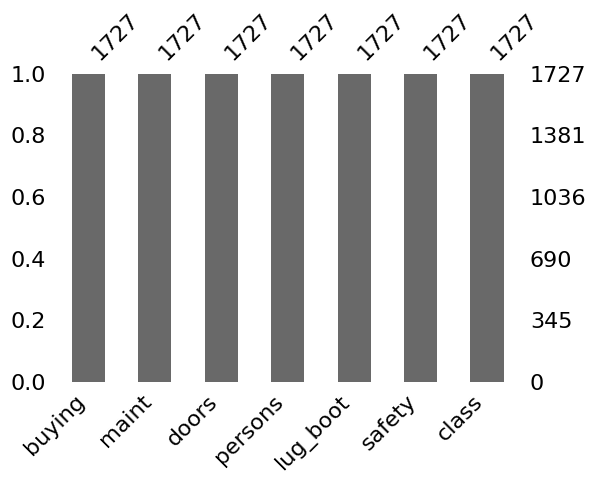

In [8]:
print(f"shape: {df.shape}")
msno.bar(df, figsize=(6,4))

5.1. Запишіть у змінну `x` всі незалежні змінні, у змінну `y` - цільову.


In [9]:
y = df['class']
x = df.drop(columns=['class'])

5.2. Розбийте дані на тренувальний та тестовий набори (ми знову ігноруємо валідацію для спрощення завдання). Визначте random_state рівним 42 та test_size рівним 0.33.

In [11]:
x_train_df, x_test_df, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

5.3. Виведіть форму та перші 5 записів отриманих x_train_df, x_test_df.

In [12]:
print(f"shape: {x_train_df.shape}")
x_train_df[:5]

shape: (1157, 6)


,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [13]:
print(f"shape: {x_test_df.shape}")
x_test_df[:5]

shape: (570, 6)


,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


6.1. Виведіть типи даних усіх змінних у x_train.

In [14]:
x_train_df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

6.2. Усі незалежні змінні у нас ординальні. Закодуйте всі незалежні змінні за допомогою відповідного методу з sklearn.preprocessing.  
Вам необхідно встановити правильний порядок значень для кожної змінної при кодуванні так, щоб значення після кодування були впорядковані в порядку зростання.
Кодування значень {'high':1,'low':2,'med':3} буде ввжатись неправильним виконанням завдання.
Подумайте, як коректно застосовувати енкодер на трен. та тест. даних.
Результат кодування x_train_df та x_test_df запишіть відповідно у x_train, x_test.

In [32]:
categories = [
  ['low', 'med', 'high', 'vhigh'],
  ['low', 'med', 'high', 'vhigh'],
  ['2', '3', '4', '5more'],
  ['2', '4', 'more'],
  ['small', 'med', 'big'],
  ['low', 'med', 'high']
]

enc = OrdinalEncoder(categories=categories)
enc.fit(x_train_df)
x_train = enc.transform(x_train_df)
x_test = enc.transform(x_test_df)

Хочу зробити гіпотетичну замітку: 
- категорії та їх порядок вказаний мною
- список значень покриває всі можливі із загального датасету
- виклик методу fit в такому разі засетапить саме ці катеогрії в незалежності від переданої вибірки згідно https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/preprocessing/_encoders.py#L116 і https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/preprocessing/_encoders.py#L152
- в той же час валідація типів і сумісності буде проходити саме на переданій виборці x_train_df

Маленький тест:

In [110]:
temp_encoder = OrdinalEncoder(categories=[['A', 'B', 'C']])
temp_x = [['A']]
temp_encoder.fit(temp_x)

print(temp_encoder.categories_)

temp_encoder.transform([['A'], ['C']])

[array(['A', 'B', 'C'], dtype=object)]


array([[0.],
       [2.]])

In [105]:
temp_encoder = OrdinalEncoder()
X = [['A']]
temp_encoder.fit(X)

print(temp_encoder.categories_)

temp_encoder.transform([['A'], ['C']])

[array(['A'], dtype=object)]


ValueError: ignored

In [107]:
temp_encoder = OrdinalEncoder()
X = [['A'], ['C']]
temp_encoder.fit(X)

print(temp_encoder.categories_)

temp_encoder.transform([['A'], ['C']])

[array(['A', 'C'], dtype=object)]


array([[0.],
       [1.]])

6.3. Виведіть перші 5 записів x_train, x_test.

In [33]:
x_train[:5]

array([[3., 3., 3., 0., 1., 0.],
       [3., 3., 1., 2., 1., 1.],
       [2., 3., 1., 1., 0., 1.],
       [3., 2., 1., 2., 1., 0.],
       [1., 2., 2., 2., 0., 0.]])

In [34]:
x_test[:5]

array([[2., 2., 2., 0., 2., 0.],
       [1., 3., 2., 1., 2., 0.],
       [2., 2., 3., 0., 2., 2.],
       [0., 2., 3., 1., 1., 1.],
       [1., 0., 2., 2., 1., 0.]])

6.4. Виведіть отримані категорії енкодера.

In [35]:
enc.categories_

[array(['low', 'med', 'high', 'vhigh'], dtype=object),
 array(['low', 'med', 'high', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['small', 'med', 'big'], dtype=object),
 array(['low', 'med', 'high'], dtype=object)]

7.1. Навчіть на отриманих даних логістичну регресію c random_state=42 та іншими параметрами по замовчуванню.

In [36]:
clf = LogisticRegression(random_state=42) # should fallback to multi_class=multinomial under the hood, as dependent variable is not binary
clf.fit(x_train, y_train)

LogisticRegression(random_state=42)

7.2. Зробіть прогнози за допомогою отриманої моделі за допомогою методу predict. 

In [37]:
y_pred = clf.predict(x_test)
y_pred[:5]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [38]:
y_test[:5]

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
Name: class, dtype: object

7.3. Виведіть метрики якості за допомогою classification_report.

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.66      0.60      0.63       127
        good       0.56      0.28      0.37        18
       unacc       0.88      0.93      0.90       399
       vgood       0.80      0.77      0.78        26

    accuracy                           0.83       570
   macro avg       0.72      0.64      0.67       570
weighted avg       0.82      0.83      0.82       570



Accuracy у цьому пункті має бути близько 0.82. 

7.4. Яку метрику якості ви рекомендуєте використовувати для порівняння різних моделей та вибору найкращої? Чому? Метрика - це одне число, що характеризує якість передбачень моделі.

> Ми передбачаємо клас автомобіля за іншими параметрами.
- Accuracy нам не підходить так як ми маємо значно незбалансовані класи для залежної змінної
- weighted avg метрики на мою думку теж є не кращим вибором оскільки через незбалансованість в загальній оцінці втрачається точність малих класів. В конкретному випадку я б не надавав перевагу найбільшим класам оскільки в нас він взагалі один це "unacc" -> 70% виборки
- macro avg має рівний вплив точності для кожного класу і в загальному випадку був би моїм вибором 
- macro avg precision був би моїм вибором якби наприклад бізнес для якого тренується модель був би зорієнтований на відборі найкращих машин і погані пропозиції під таким лейблом значно погіршували б виторг-репутацію, і варіант додаткової валідації відібраних авто не був би можливим
- macro avg recall був би моїм вибором якби для бізнесу важливіший розмір пропозиції під конкретним лейблом якості ніж попадання туди помилкових, або якщо б після відбору моделі проводилась додаткова валідація якості для певного класу як наприклад для "vgood", "good"
- оскільки специфіки бізнесу і вимог я не маю, то вибір зупиниться на **macro avg f1-score**, як забалнсованій оцінці точності з урахуванням диспропорції у класах виборки



8.1. Навчіть Decision Tree з sklearn з глибиною 4 за тими ж даними. Обчисліть прогнози, знайдіть метрику якості на test даних. Порівняйте з регресією логістики. Яка модель краща?

In [48]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf = dt_clf.fit(x_train, y_train)

In [49]:
dt_y_pred = dt_clf.predict(x_test)
dt_y_pred[:5]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc'], dtype=object)

In [50]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         acc       0.75      0.72      0.74       127
        good       0.31      1.00      0.47        18
       unacc       0.96      0.94      0.95       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.85       570
   macro avg       0.51      0.67      0.54       570
weighted avg       0.85      0.85      0.84       570



Accuracy покращилось, але я обрав метрику macro avg f1-score яка стала гірше, як бачимо по класово vgood дерево жодного разу не вгадало

8.2. Виведіть параметри моделі Decision Tree.

In [55]:
print(export_text(dt_clf, feature_names=x_train_df.columns.to_list()))

|--- safety <= 0.50
|   |--- class: unacc
|--- safety >  0.50
|   |--- persons <= 0.50
|   |   |--- class: unacc
|   |--- persons >  0.50
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- class: good
|   |   |   |--- maint >  1.50
|   |   |   |   |--- class: acc
|   |   |--- buying >  1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- class: acc
|   |   |   |--- maint >  1.50
|   |   |   |   |--- class: unacc



<font color='blue'>**[Optional]**</font> 8.3. Візуалізуйте отримане дерево в будь-якому з існуючих методів. Зображення повинно мати графік з критеріями у вузлах, класах та кількості елементів у кожному аркуші.

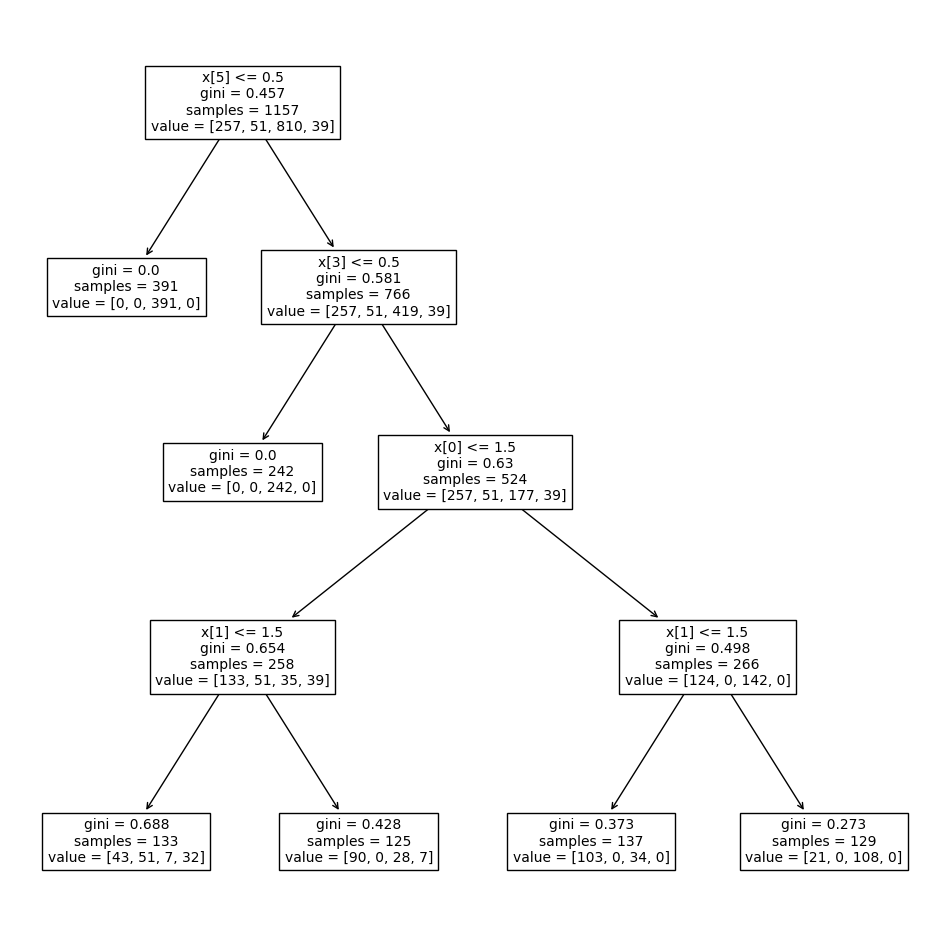

In [58]:
plt.figure(figsize=(12,12))
tree.plot_tree(dt_clf, fontsize=10)
plt.show()

9.1. Виконайте пошук гіперпараметрів для DecisionTree за сіткою за допомогою sklearn. Встановіть сітку з параметрів самостійно на основі припущень, що може покращити роботу дерева.
Вам вдалося знайти модель, яка працює краще, ніж побудована у пункті 8.1?

In [ ]:
# ваш код тут

9.2. Виведіть claasification report фінальної моделі пошуку гіперпараметрів.

In [ ]:
# ваш код тут

9.3. Виведіть матрицю помилок для кращої моделі у пошуку гіперпараметрів. Відобразіть матрицю візуально (у вигляді графіка із зафарбованими за значеннями клітинами або у вигляді таблиці із зафарбовуванням фону).

In [ ]:
# ваш код тут

9.4. Зробіть висновок, які класи, з якими моделями найбільше плутаються?

>ваша відповідь тут